# Importing Basic Libraries

* **In this work I carried out a small analysis of credit loans from people who paid and did not pay the loan.**

* **Some data are very interesting when related to the reasons for the loan, and when we compare those who paid and those who did not.**

* **I used 8 of the most used algorithms when it comes to credit analysis.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Credit Database

In [2]:
base_credit = pd.read_csv('../input/credit-risk-dataset/credit_risk_dataset.csv')

In [3]:
base_credit

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [4]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
base_credit = base_credit.dropna()


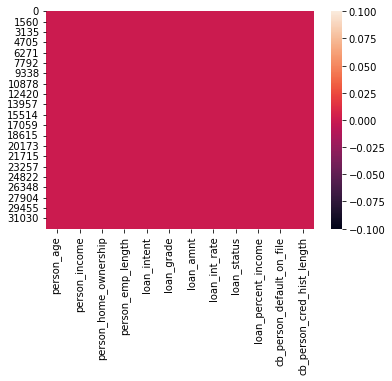

In [7]:
sns.heatmap(base_credit.isnull());

# Data Exploration

In [8]:
temp = base_credit.describe()
temp.style.background_gradient(cmap='Oranges')

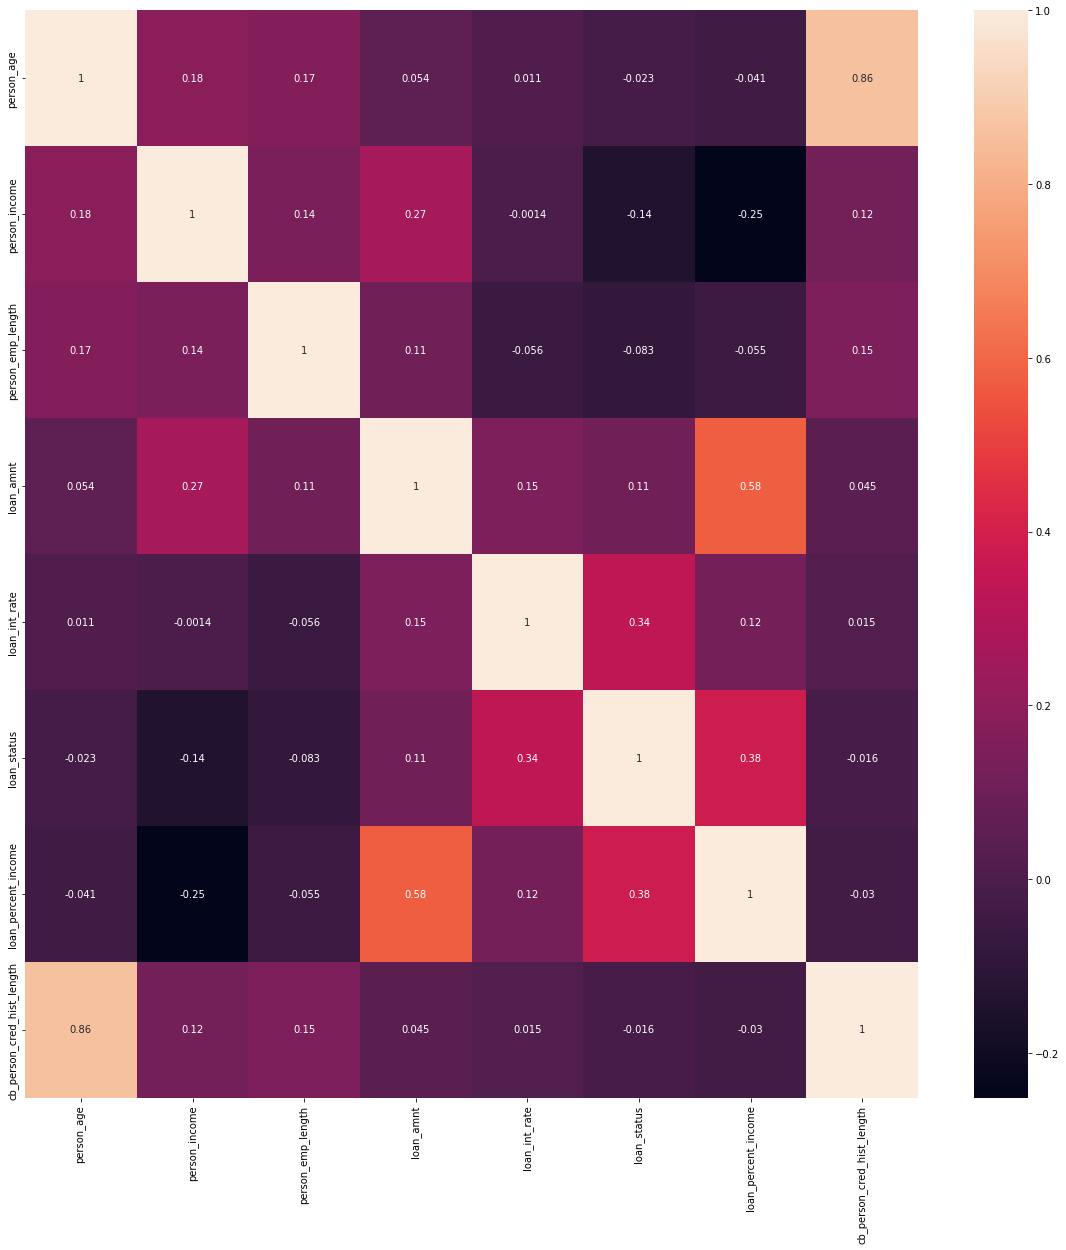

In [9]:
correlations = base_credit.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
correlations.round(2);

In [10]:
base_credit = base_credit[base_credit['person_age'] <= 84]

In [11]:
base_credit['person_age'].max()

84

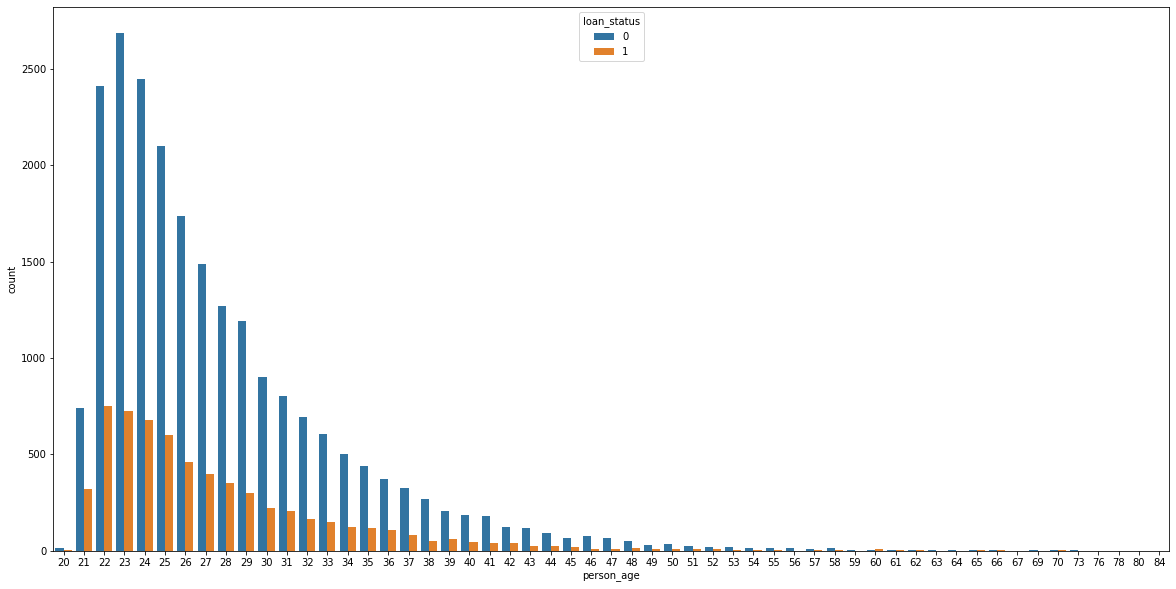

In [12]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'person_age', hue= 'loan_status', data=base_credit);

We can observe that people who are younger have a tendency not to pay the loan, 0 paid and 1 did not.
The greatest default is among the youngest.

In [13]:
debtor = base_credit[base_credit['loan_status'] == 1]
no_debtor = base_credit[base_credit['loan_status'] == 0]

* In this graph we can analyze the people who are in debt, what were the reasons for the loan.

**Debtor**

In [14]:
fig1 = px.histogram(debtor,x='loan_intent',color='loan_intent',template='plotly_dark')
fig1.show()


* An interesting fact is that the people most likely to default on the loan are the youngest, and the biggest expense on loans is for medical expenses, at least that's what they declare to the financial institution.
* One of the reasons may be that many do not have health insurance and, in an emergency, end up borrowing money.

* Debt consolidation is a unification of all debts of an individual. In general, it occurs when it is more advantageous to take out a loan to pay off debts – all of which you owe –, transforming a tangle of bills into a single installment to be paid off.

* In the following graph we see that those who pay the loan used the amount to pay the student loan, the education factor ends up being an interesting factor for the payment.

**No Debtor**

In [15]:
fig1 = px.histogram(no_debtor,x='loan_intent',color='loan_intent',template='plotly_dark')
fig1.show()

**Debtor**

In [16]:
fig1 = px.histogram(debtor,x='person_home_ownership',color='person_home_ownership',template='plotly_dark')
fig1.show()

**No Debtor**

In [17]:
fig1 = px.histogram(no_debtor,x='person_home_ownership',color='person_home_ownership',template='plotly_dark')
fig1.show()

* People who pay rent on their homes are both those who don't pay the loan and those who pay the loan.
* The number is much higher in those who pay the loan when related to mortgage.

**Debtor**

In [18]:
fig1 = px.histogram(debtor,x='person_age',color='person_age',template='plotly_dark')
fig1.show()

In [19]:
grafico = px.scatter_matrix(base_credit, dimensions=['person_age', 'person_income', 'loan_amnt'], color = 'loan_status')
grafico.show()

In [20]:
grafico = px.treemap(base_credit, path=['person_age','person_income', 'loan_amnt'])
grafico.show()

In [21]:
grafico = px.parallel_categories(base_credit, dimensions=['loan_intent', 'loan_grade'])
grafico.show()

In [22]:
grafico = px.parallel_categories(base_credit, dimensions=['loan_intent', 'loan_grade', 'loan_status'])
grafico.show()

# Initial Processing Data

# Division between predictors and class

* One variable we will use just to store the predictor attributes that will be person_age, loan_amnt, person_income, and the other variable just to store the class.

In [23]:
X_credit = base_credit.drop(columns=['loan_status'])
X_credit

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
0             PERSONAL          D      35000          16.02   
1            EDUCATION          B       1000          11.14   
2              MEDICAL          C       5500          12.87   
3              MEDICAL          C      35000          15.23   
4              MEDICAL          C      35000          14.27   
...                ...        ...        ...            ...   
32576         PERSONAL          C       5800          13.16   
32577         PERSONAL          A      17625           7.49   
32578  HOMEIMPROVEMENT          B      35000          10.99   
32579         PERSONAL          B      15000          11.48   
32580          MEDICAL          B       6475           9.99   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[28634 rows x 11 columns]

In [24]:
X_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [25]:
X_credit = X_credit.values

In [26]:
type(X_credit)

numpy.ndarray

In [27]:
X_credit

array([[22, 59000, 'RENT', ..., 0.59, 'Y', 3],
       [21, 9600, 'OWN', ..., 0.1, 'N', 2],
       [25, 9600, 'MORTGAGE', ..., 0.57, 'N', 3],
       ...,
       [65, 76000, 'RENT', ..., 0.46, 'N', 28],
       [56, 150000, 'MORTGAGE', ..., 0.1, 'N', 26],
       [66, 42000, 'RENT', ..., 0.15, 'N', 30]], dtype=object)

In [28]:
y_credit = base_credit.iloc[:, 8].values

In [29]:
y_credit

array([1, 0, 1, ..., 1, 0, 0])

# LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()

In [31]:
X_credit[0]

array([22, 59000, 'RENT', 123.0, 'PERSONAL', 'D', 35000, 16.02, 0.59, 'Y',
       3], dtype=object)

In [32]:
label_encoder_person_home_ownership = LabelEncoder()
label_encoder_loan_intent = LabelEncoder()
label_encoder_loan_grade = LabelEncoder()
label_encoder_cb_person_default_on_file = LabelEncoder()

In [33]:
X_credit[:,2] = label_encoder_person_home_ownership.fit_transform(X_credit[:,2])
X_credit[:,4] = label_encoder_loan_intent.fit_transform(X_credit[:,2])
X_credit[:,5] = label_encoder_loan_grade.fit_transform(X_credit[:,5])
X_credit[:,9] = label_encoder_cb_person_default_on_file.fit_transform(X_credit[:,9])


In [34]:
X_credit[0]

array([22, 59000, 3, 123.0, 3, 3, 35000, 16.02, 0.59, 1, 3], dtype=object)

In [35]:
X_credit

array([[22, 59000, 3, ..., 0.59, 1, 3],
       [21, 9600, 2, ..., 0.1, 0, 2],
       [25, 9600, 0, ..., 0.57, 0, 3],
       ...,
       [65, 76000, 3, ..., 0.46, 0, 28],
       [56, 150000, 0, ..., 0.1, 0, 26],
       [66, 42000, 3, ..., 0.15, 0, 30]], dtype=object)

# OneHotEncoder

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [37]:
onehotencoder_credit = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,2,4,5,9,10])], remainder='passthrough')

In [38]:
X_credit = onehotencoder_credit.fit_transform(X_credit).toarray()

In [39]:
X_credit

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 3.500e+04, 1.602e+01,
        5.900e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+03, 1.114e+01,
        1.000e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.500e+03, 1.287e+01,
        5.700e-01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.500e+04, 1.099e+01,
        4.600e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+04, 1.148e+01,
        1.000e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.475e+03, 9.990e+00,
        1.500e-01]])

In [40]:
X_credit.shape

(28634, 106)

# Escalation of values

In [41]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [42]:
X_credit[0]

array([-2.21171520e-02, -1.96162362e-01,  2.83774523e+00, -3.67863749e-01,
       -3.50322490e-01, -3.22661485e-01, -2.88560441e-01, -2.65612440e-01,
       -2.45205790e-01, -2.34540033e-01, -2.02320406e-01, -1.91016667e-01,
       -1.75966506e-01, -1.64899514e-01, -1.49379571e-01, -1.41106176e-01,
       -1.30848543e-01, -1.20377322e-01, -1.06477923e-01, -9.75659199e-02,
       -9.11616388e-02, -8.75884366e-02, -7.61300063e-02, -7.05964243e-02,
       -6.37777894e-02, -5.64639020e-02, -5.48859748e-02, -5.15873123e-02,
       -4.76989873e-02, -3.78671017e-02, -3.96740718e-02, -3.39677172e-02,
       -3.39677172e-02, -3.01469184e-02, -2.70911818e-02, -2.50802458e-02,
       -2.21171520e-02, -2.28938273e-02, -2.43731920e-02, -1.32154487e-02,
       -2.13122486e-02, -1.67172432e-02, -1.44770516e-02, -1.02362850e-02,
       -1.56372760e-02, -1.32154487e-02, -1.67172432e-02, -5.90971549e-03,
       -1.32154487e-02, -1.32154487e-02, -8.35774575e-03, -5.90971549e-03,
       -5.90971549e-03, -

# Division of bases into training and testing

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size = 0.15, random_state = 0)

In [45]:
X_credit_train.shape

(24338, 106)

In [46]:
y_credit_train.shape

(24338,)

In [47]:
X_credit_test.shape, y_credit_test.shape

((4296, 106), (4296,))

# Naïve Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
naive_credit = GaussianNB()
naive_credit.fit(X_credit_train, y_credit_train)
predictions = naive_credit.predict(X_credit_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
accuracy_score(y_credit_test, predictions) 

0.22136871508379888

In [52]:
confusion_matrix(y_credit_test, predictions)

array([[  34, 3333],
       [  12,  917]])

In [53]:
from yellowbrick.classifier import ConfusionMatrix

0.22136871508379888

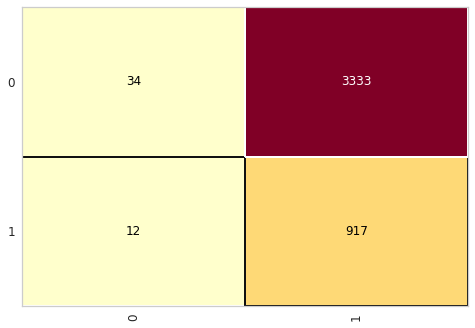

In [54]:
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [55]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.01      0.02      3367
           1       0.22      0.99      0.35       929

    accuracy                           0.22      4296
   macro avg       0.48      0.50      0.19      4296
weighted avg       0.63      0.22      0.09      4296



* **One of the reasons for the bad result of this algorithm is the fact that the combination of characteristics, each pair is independent, which is not always true, contributing to the bad performance of this algorithm.**

# Decision Trees

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
credit_tree = DecisionTreeClassifier(criterion='entropy')
credit_tree.fit(X_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
predictions = credit_tree.predict(X_credit_test)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [59]:
accuracy_score(y_credit_test, predictions) 

0.8733705772811918

0.8733705772811918

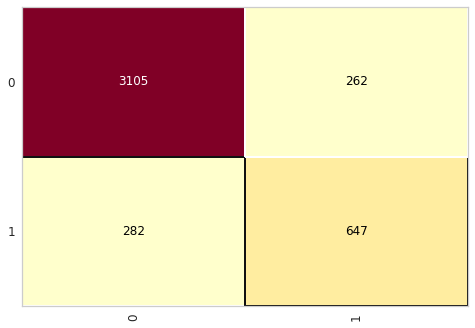

In [60]:
cm = ConfusionMatrix(credit_tree)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [61]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3367
           1       0.71      0.70      0.70       929

    accuracy                           0.87      4296
   macro avg       0.81      0.81      0.81      4296
weighted avg       0.87      0.87      0.87      4296



* **The results of the decision tree algorithm are much more interesting than Naïve Bayes, this is one of the reasons that the decision tree is still widely used in the banking sector.**

# XGBoost

In [62]:
from xgboost import XGBClassifier

In [63]:
xgboost = XGBClassifier(n_estimators=1000, max_depth=15, learning_rate=0.05, objective='binary:logistic', random_state=10)
xgboost.fit(X_credit_train, y_credit_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:24:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
xgboost.score(X_credit_train, y_credit_train)

0.9999589119894815

In [65]:
xgboost.score(X_credit_test, y_credit_test)

0.9143389199255121

In [66]:
predictions_test = xgboost.predict(X_credit_test)

In [67]:
predictions_test

array([1, 0, 0, ..., 1, 0, 0])

In [68]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [69]:
accuracy_score(y_credit_test, predictions) 

0.8733705772811918

0.9143389199255121

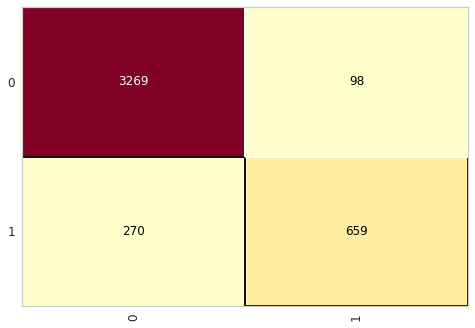

In [70]:
cm = ConfusionMatrix(xgboost)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

* ***XGboost are very interesting for our algorithm.***

* ***Its results were good because its development is based on a decision tree.***

In [71]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3367
           1       0.71      0.70      0.70       929

    accuracy                           0.87      4296
   macro avg       0.81      0.81      0.81      4296
weighted avg       0.87      0.87      0.87      4296



# CATBoost

In [72]:
from catboost import CatBoostClassifier

In [73]:
df_cat = pd.read_csv('../input/credit-risk-dataset/credit_risk_dataset.csv')

In [74]:
df_cat

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [75]:
result = df_cat.iloc[:, 8]
result

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [76]:
predictions_cat =  df_cat.drop(columns=['loan_status'])
predictions_cat

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
0             PERSONAL          D      35000          16.02   
1            EDUCATION          B       1000          11.14   
2              MEDICAL          C       5500          12.87   
3              MEDICAL          C      35000          15.23   
4              MEDICAL          C      35000          14.27   
...                ...        ...        ...            ...   
32576         PERSONAL          C       5800          13.16   
32577         PERSONAL          A      17625           7.49   
32578  HOMEIMPROVEMENT          B      35000          10.99   
32579         PERSONAL          B      15000          11.48   
32580          MEDICAL          B       6475           9.99   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 11 columns]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(predictions_cat, result, test_size = 0.3, random_state = 0)

In [78]:
categorics = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [79]:
catboost = CatBoostClassifier(task_type='CPU', iterations=140, learning_rate=0.1, depth = 5, random_state = 5, 
                              eval_metric="Accuracy")

In [80]:
catboost.fit( x_train, y_train, cat_features= categorics, plot=True, eval_set=(x_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8340788	test: 0.8395908	best: 0.8395908 (0)	total: 60.2ms	remaining: 8.37s
1:	learn: 0.8365781	test: 0.8424552	best: 0.8424552 (1)	total: 70.5ms	remaining: 4.86s
2:	learn: 0.8506533	test: 0.8557545	best: 0.8557545 (2)	total: 78.9ms	remaining: 3.6s
3:	learn: 0.8526703	test: 0.8572890	best: 0.8572890 (3)	total: 88.2ms	remaining: 3s
4:	learn: 0.8538542	test: 0.8579028	best: 0.8579028 (4)	total: 96.4ms	remaining: 2.6s
5:	learn: 0.8509164	test: 0.8559591	best: 0.8579028 (4)	total: 104ms	remaining: 2.33s
6:	learn: 0.8505656	test: 0.8553453	best: 0.8579028 (4)	total: 112ms	remaining: 2.13s
7:	learn: 0.8507849	test: 0.8554476	best: 0.8579028 (4)	total: 120ms	remaining: 1.98s
8:	learn: 0.8549066	test: 0.8582097	best: 0.8582097 (8)	total: 129ms	remaining: 1.87s
9:	learn: 0.8620538	test: 0.8656777	best: 0.8656777 (9)	total: 137ms	remaining: 1.78s
10:	learn: 0.8746821	test: 0.8785678	best: 0.8785678 (10)	total: 145ms	remaining: 1.7s
11:	learn: 0.8786723	test: 0.8839898	best: 0.8839898 

In [81]:
predictions_cat = catboost.predict(x_test)
predictions_cat

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
result

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [83]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions_cat) * 100.0))

Accuracy: 93.41%


In [84]:
confusion_matrix(y_test, predictions_cat)

array([[7675,   69],
       [ 575, 1456]])

In [85]:
print(classification_report(y_test, predictions_cat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7744
           1       0.95      0.72      0.82      2031

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.89      9775
weighted avg       0.94      0.93      0.93      9775



* ***CatBoost's results were the best so far, even better than XGBoost.***

* ***Its good results are due to the fact that it is also based on decision trees, due to being an evolution of XGBoost.***

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_train, y_credit_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [88]:
predictions_random = random_forest_credit.predict(X_credit_test)
predictions_random

array([1, 0, 0, ..., 1, 0, 0])

In [89]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [90]:
accuracy_score(y_credit_test, predictions_random)

0.9036312849162011

0.9036312849162011

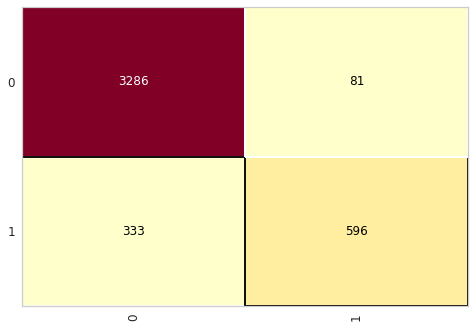

In [91]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [92]:
print(classification_report(y_credit_test, predictions_random))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3367
           1       0.88      0.64      0.74       929

    accuracy                           0.90      4296
   macro avg       0.89      0.81      0.84      4296
weighted avg       0.90      0.90      0.90      4296



# Instance-based learning - knn

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_train, y_credit_train)

KNeighborsClassifier()

In [95]:
predictions_knn = knn_credit.predict(X_credit_test)
predictions_knn

array([1, 0, 0, ..., 1, 0, 0])

In [96]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [97]:
accuracy_score(y_credit_test, predictions_knn) 

0.8538175046554934

0.8538175046554934

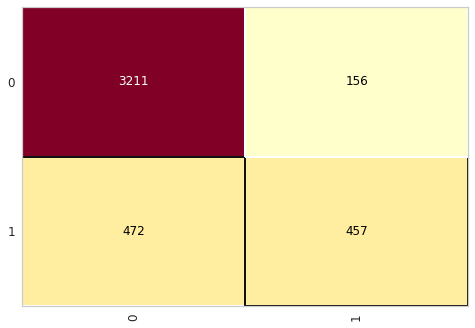

In [98]:
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [99]:
print(classification_report(y_credit_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3367
           1       0.75      0.49      0.59       929

    accuracy                           0.85      4296
   macro avg       0.81      0.72      0.75      4296
weighted avg       0.84      0.85      0.84      4296



* ***The Knn lags behind the other algorithms in their results.***

# SVM

In [100]:
from sklearn.svm import SVC

In [101]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_credit_train, y_credit_train)

SVC(C=2.0, random_state=1)

In [102]:
predictions_svm = svm_credit.predict(X_credit_test)
predictions_svm

array([1, 0, 0, ..., 1, 0, 0])

In [103]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [104]:
accuracy_score(y_credit_test, predictions_svm)

0.8789571694599627

0.8789571694599627

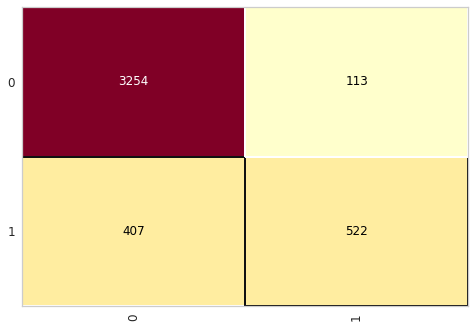

In [105]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [106]:
print(classification_report(y_credit_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3367
           1       0.82      0.56      0.67       929

    accuracy                           0.88      4296
   macro avg       0.86      0.76      0.80      4296
weighted avg       0.87      0.88      0.87      4296



# Artificial Neural Networks

In [107]:
from sklearn.neural_network import MLPClassifier

In [108]:
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_train, y_credit_train)

Iteration 1, loss = 0.47047961
Iteration 2, loss = 0.38221479
Iteration 3, loss = 0.34918235
Iteration 4, loss = 0.33451669
Iteration 5, loss = 0.32663653
Iteration 6, loss = 0.32145901
Iteration 7, loss = 0.31775438
Iteration 8, loss = 0.31481297
Iteration 9, loss = 0.31232188
Iteration 10, loss = 0.31037462
Iteration 11, loss = 0.30832007
Iteration 12, loss = 0.30623146
Iteration 13, loss = 0.30386515
Iteration 14, loss = 0.30178851
Iteration 15, loss = 0.29983169
Iteration 16, loss = 0.29735165
Iteration 17, loss = 0.29492027
Iteration 18, loss = 0.29254641
Iteration 19, loss = 0.29076154
Iteration 20, loss = 0.28848147
Iteration 21, loss = 0.28618631
Iteration 22, loss = 0.28498277
Iteration 23, loss = 0.28353374
Iteration 24, loss = 0.28208540
Iteration 25, loss = 0.28035661
Iteration 26, loss = 0.27891615
Iteration 27, loss = 0.27759248
Iteration 28, loss = 0.27664879
Iteration 29, loss = 0.27557391
Iteration 30, loss = 0.27465748
Iteration 31, loss = 0.27326586
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [109]:
predictions_neural = rede_neural_credit.predict(X_credit_test)
predictions_neural

array([1, 0, 0, ..., 1, 0, 0])

In [110]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [111]:
accuracy_score(y_credit_test, predictions_neural)

0.8789571694599627

0.8789571694599627

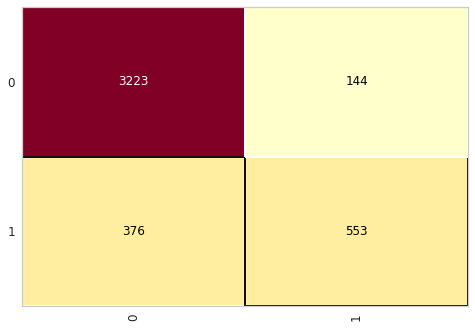

In [112]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [113]:
print(classification_report(y_credit_test, predictions_neural))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3367
           1       0.79      0.60      0.68       929

    accuracy                           0.88      4296
   macro avg       0.84      0.78      0.80      4296
weighted avg       0.87      0.88      0.87      4296



* ***The results of the neural networks were also satisfactory compared to the previous algorithms.***

**NOTE: These percentages are from data performed at the time of creation of the algorithm, when we save the algorithm it compiles the code again, which may have a slight variation in the results for more or less.**

# Algorithm Evaluation


* **Naive Bayes: 22.13%**

* **Decision tree: 87,19%**

* **Random forest: 90,68%**

* **XGBoost => 91,43%**

* **CatBoost => 93,41%**

* **KNN: 85,38%**

* **SVM: 87,89%**

* **Neural networks: 87,77%**

# **Conclusion**

* We could continue our project, which would take more time, the focus of this work was only to analyze and compare the results of the most used algorithms when it comes to credit analysis with a focus on the risk of its concession to non-payers.

* We could still continue our work with Tuning the parameters with GridSearch, cross-validation, hypothesis testing with ANOVA and Tukey and carry out the combination of these classifiers to achieve the best possible precision and reduce the risk of granting a loan to a person with a high degree of risk of not pay.

* In this work, CatBoost performed best among the algorithms.

* CatBoost is one of the most current algorithms at the moment, as it is based on decision trees in supervised learning of classification and regression.
It is an evolution of the Gradient Boosting algorithm which in turn is also an evolution of Random Forest.
One of the good factors of CatBoost is its high processing speed, automatically executing the transformation of the categorical variables of the database, which is a great differential.
We can use it for large and low volumes of data, since we are in the age of Big Data, it ends up being a great ally.

**Advantages of CatBoost:**

 - There is the possibility of training on multiple GPUs;
 - Provides great results with default parameters;
 - Offers greater accuracy due to reduced over-adjustment;
 - Handles missing values ​​internally;
 - Can be used for regression and classification problems;